In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#import pandas as pd

plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn import datasets

/var/folders/tl/2q9xlmys6xd62s7_0hm98f1h0000gn/T/ipykernel_70538/2978043505.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
import csv

input_file_path = 'MWSC_catalogue.csv'
output_file_path = 'MWSC_data/MWSC_glob_open.csv'

# Open the input CSV file for reading
with open(input_file_path, 'r') as file:
    csv_reader = csv.reader(file)
    count = 0
    # Open a new CSV file for writing
    with open(output_file_path, 'w', newline='') as output_file:
        csv_writer = csv.writer(output_file)

        # Iterate through rows in the input file
        for row in csv_reader:
            # Check conditions
            #if row[-1] == 'OPEN STAR CLUSTER' and row[-3] and row[-8] or row[-1] == 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' and row[-3] and row[-8]:
            if row[-1] == 'OPEN STAR CLUSTER' or row[-1] == 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC':
                # Print the row (optional)
                #print(row)
                count+=1

                #Write the row to the new CSV file
                csv_writer.writerow(row)

#print(f"Filtered rows saved to {output_file_path}")
#print(count)

In [5]:
import csv

def read_csv_and_create_array(file_path, first_column_index, second_column_index):
    data_array = []

    try:
        with open(file_path, 'r', newline='') as csvfile:
            reader = csv.reader(csvfile)
            next(reader)
            for row in reader:
                # Ensure the row has enough columns based on the provided indices
                if len(row) > max(first_column_index, second_column_index):
                    data_array.append([float(row[first_column_index]), np.abs(float(row[second_column_index]))])
                else:
                    print(f"Row {row} does not have enough columns. Skipping.")

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None

    return np.array(data_array)

# Example usage:
csv_file_path = 'MWSC_data/MWSC_glob_open.csv'
first_column_index = -7
second_column_index = 6

result = read_csv_and_create_array(csv_file_path, first_column_index, second_column_index)

if result is not None:
    print(result)
result1=[]
for i in result:
    if 600 > i[1] > -600:
        result1.append(i)
result1=np.array(result1)

[[ 8.255  2.266]
 [ 7.28   3.727]
 [ 8.79   5.256]
 ...
 [10.1   49.261]
 [ 8.395  2.378]
 [ 7.4    9.934]]


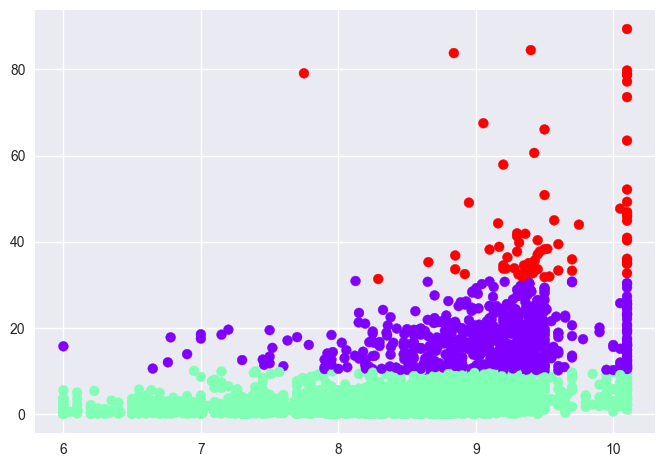

In [6]:
from sklearn.cluster import KMeans
est = KMeans(3)  # 3 clusters
est.fit(result)
y_kmeans = est.predict(result)
plt.scatter(result[:,0], result[:, 1], c=y_kmeans, s=50, cmap='rainbow');

Text(0.5, 1.0, '|galactic latitude| v. log(age)')

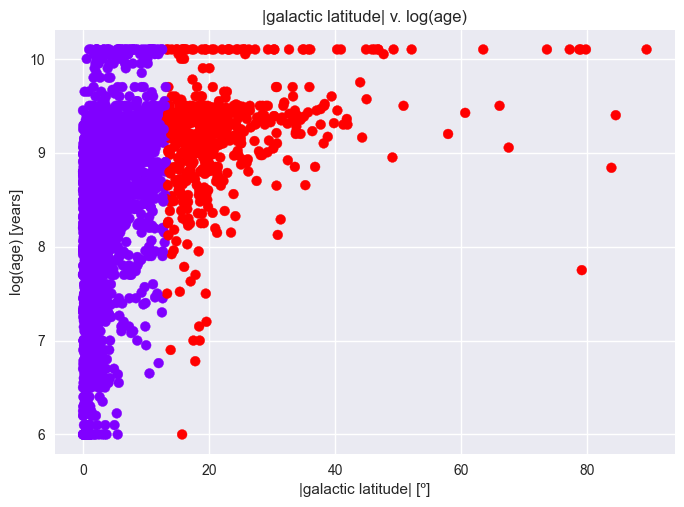

In [7]:
from sklearn.cluster import KMeans
est = KMeans(2)  # 3 clusters
est.fit(result1)
y_kmeans = est.predict(result1)
plt.scatter(result1[:,1], result1[:, 0], c=y_kmeans, s=50, cmap = 'rainbow');
plt.ylabel('log(age) [years]')
plt.xlabel('|galactic latitude| [º]')
plt.title('|galactic latitude| v. log(age)')
#plt.savefig('4_divisions.png')

Ignoring non-numeric column: name
Ignoring non-numeric column: broad_type
Ignoring non-numeric column: cluster_status


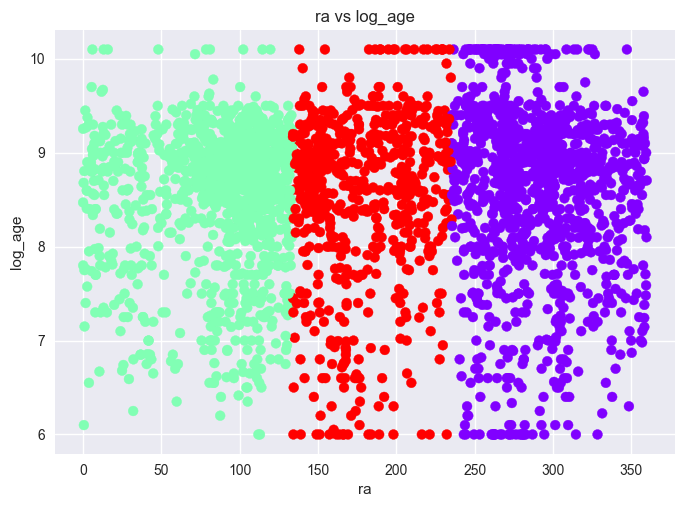

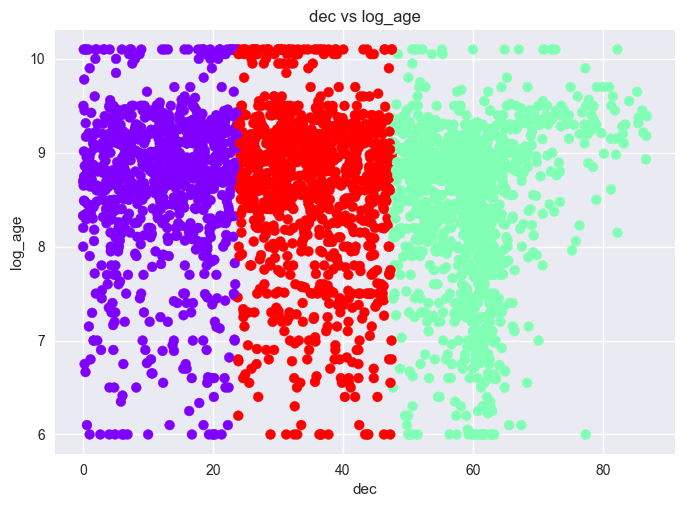

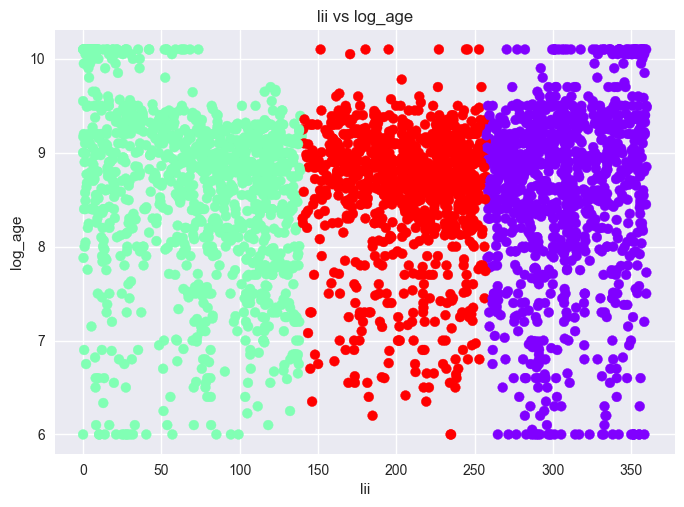

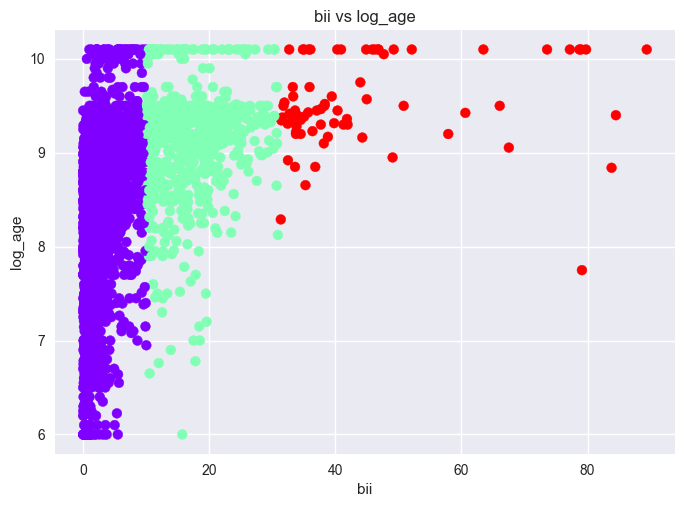

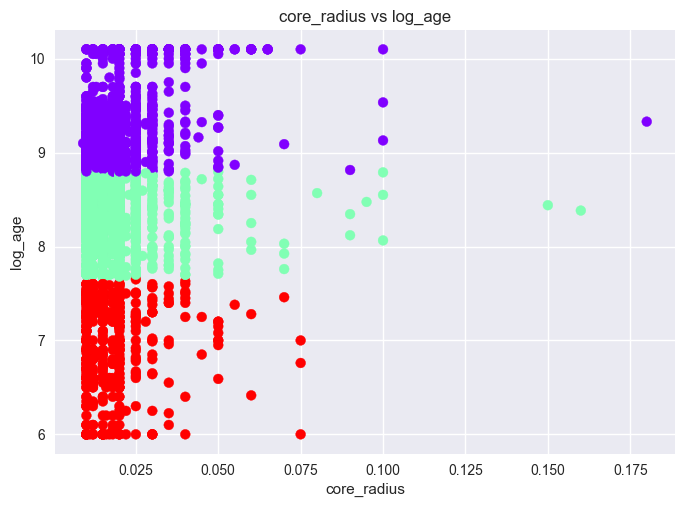

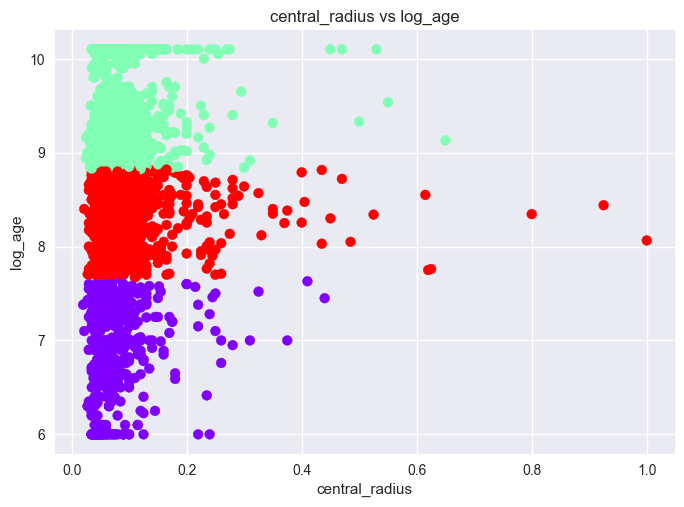

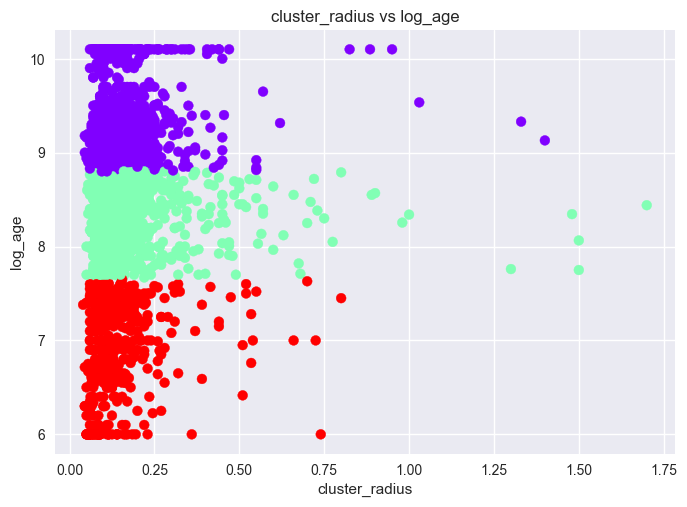

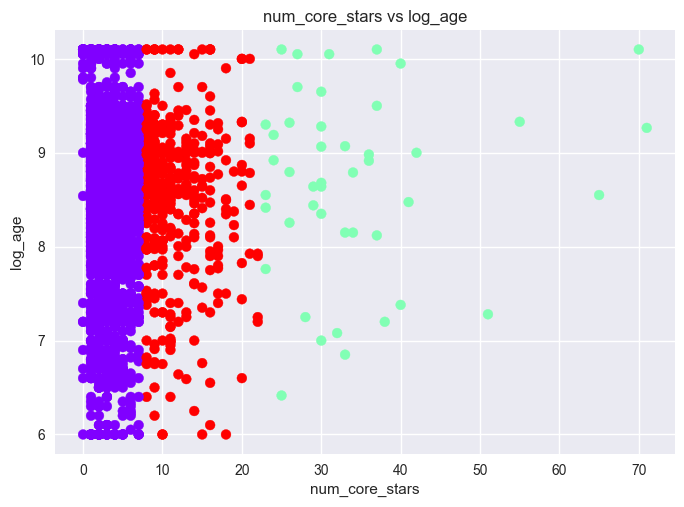

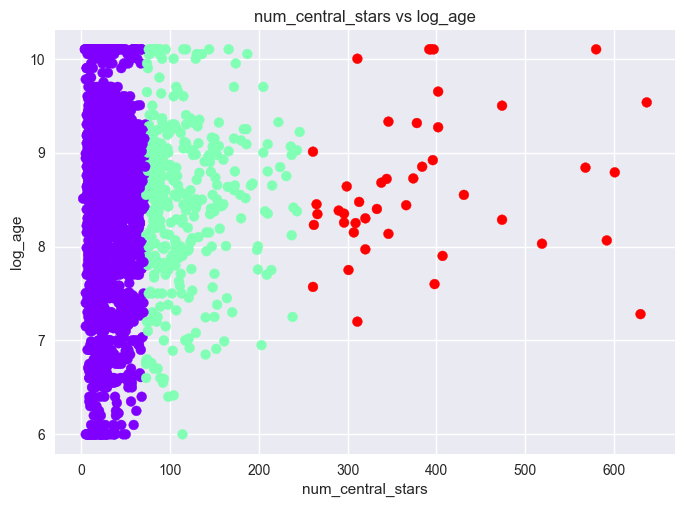

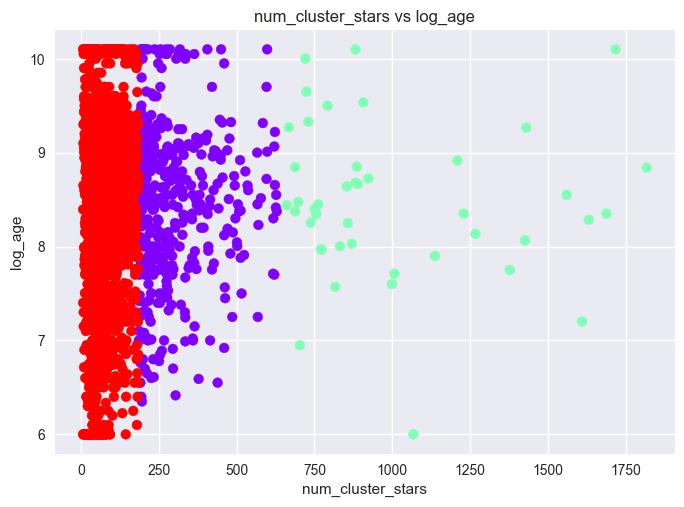

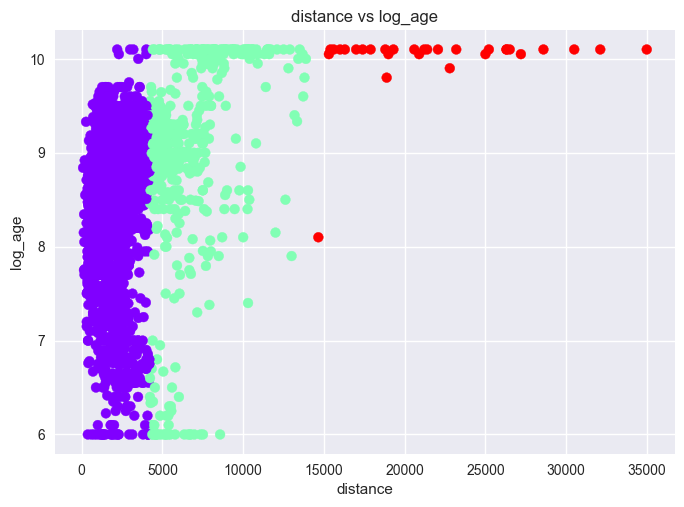

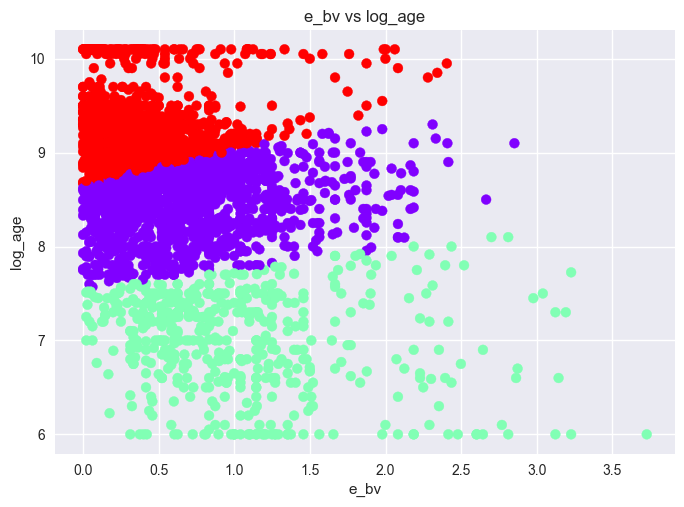

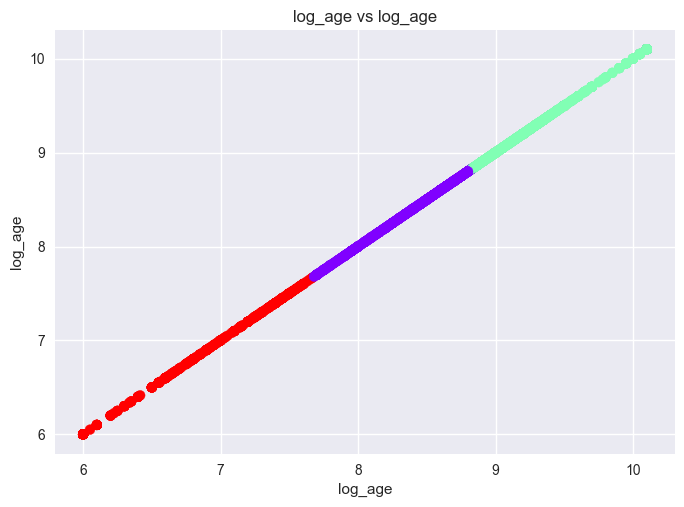

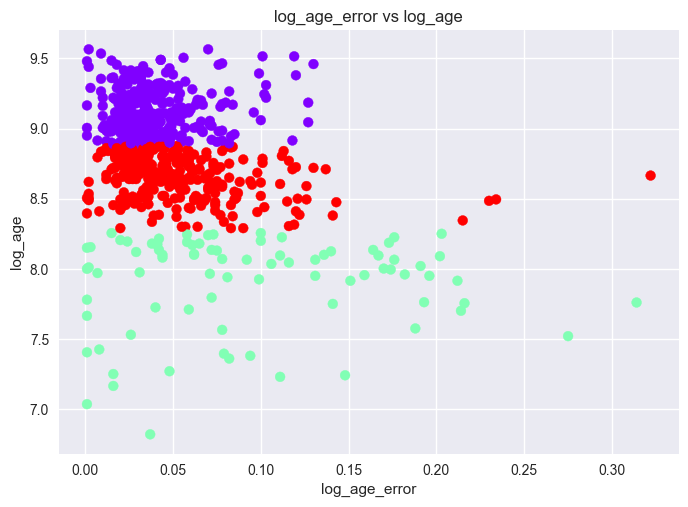

Ignoring non-numeric column: reference_code
Ignoring non-numeric column: cluster_type


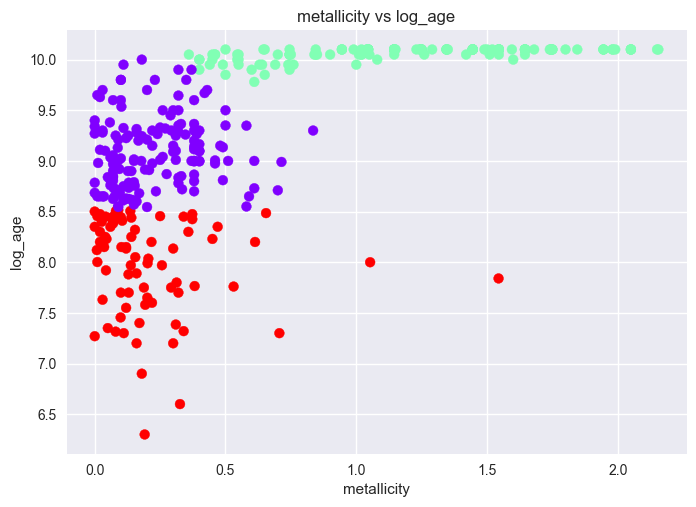

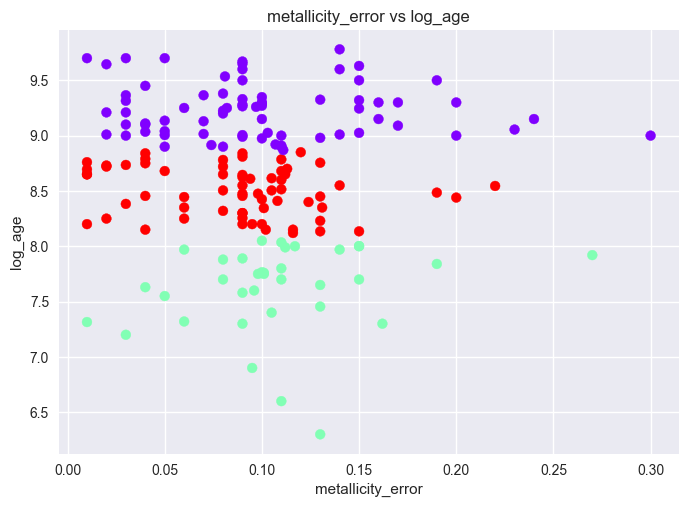

Ignoring non-numeric column: class
Scatter plots created and saved: ['scatter_plot_ra_vs_log_age.png', 'scatter_plot_dec_vs_log_age.png', 'scatter_plot_lii_vs_log_age.png', 'scatter_plot_bii_vs_log_age.png', 'scatter_plot_core_radius_vs_log_age.png', 'scatter_plot_central_radius_vs_log_age.png', 'scatter_plot_cluster_radius_vs_log_age.png', 'scatter_plot_num_core_stars_vs_log_age.png', 'scatter_plot_num_central_stars_vs_log_age.png', 'scatter_plot_num_cluster_stars_vs_log_age.png', 'scatter_plot_distance_vs_log_age.png', 'scatter_plot_e_bv_vs_log_age.png', 'scatter_plot_log_age_vs_log_age.png', 'scatter_plot_log_age_error_vs_log_age.png', 'scatter_plot_metallicity_vs_log_age.png', 'scatter_plot_metallicity_error_vs_log_age.png']


In [11]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

def create_scatter_plots(csv_file_path, target_column_index):
    try:
        # Read the CSV file and get column titles
        with open(csv_file_path, 'r', newline='') as csvfile:
            reader = csv.reader(csvfile)
            column_titles = next(reader)  # Read the first row as column titles

            # Create an array to store scatter plots
            scatter_plots = []

            # Iterate through each column (excluding the target column)
            for i in range(len(column_titles)):
                if i != target_column_index:
                    # Read data for the scatter plot, handling non-numeric and empty values
                    scatter_data = []
                    try:
                        for row in reader:
                            # Check for 'OPEN STAR CLUSTER' or 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC'
                            if row[-1] in ['OPEN STAR CLUSTER', 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC']:
                                if row[target_column_index] and row[i]:
                                    scatter_data.append([np.abs(float(row[i])), float(row[target_column_index])])
                                 # use absolute value here ^ to get age v. galactic latitude plot
                                # did not use absolute value to get age v. metallicity plot
                    except ValueError:
                        print(f"Ignoring non-numeric column: {column_titles[i]}")
                        continue

                    # Convert scatter data to numpy array for easier manipulation
                    scatter_data = np.array(scatter_data)

                    # Calculate the median and standard deviation of the x-values
                    median_x = np.median(scatter_data[:, 0])
                    std_dev_x = np.std(scatter_data[:, 0])

                    # Filter out data points more than 10 standard deviations from the median
                    filtered_data = scatter_data[
                        np.abs(scatter_data[:, 0] - median_x) <= 10 * std_dev_x
                    ]

                    # Use KMeans for clustering
                    est = KMeans(3)
                    est.fit(filtered_data)
                    y_kmeans = est.predict(filtered_data)

                    # Plot the scatter plot with color-coded clusters
                    plt.scatter(filtered_data[:, 0], filtered_data[:, 1], c=y_kmeans, s=50, cmap='rainbow')

                    # Label the plot
                    plt.title(f'{column_titles[i]} vs {column_titles[target_column_index]}')
                    plt.xlabel(column_titles[i])
                    plt.ylabel(column_titles[target_column_index])

                    # Save the plot to a file or display it
                    # You can customize this part based on your preference
                    plot_filename = f'scatter_plot_{column_titles[i]}_vs_{column_titles[target_column_index]}.png'
                    #plt.savefig(plot_filename)
                    scatter_plots.append(plot_filename)
                    plt.show()

                    # Reset file pointer for the next iteration
                    csvfile.seek(0)
                    next(reader)  # Skip the header row

            return scatter_plots

    except FileNotFoundError:
        print(f"File not found: {csv_file_path}")
        return None

# Example usage:
csv_file_path = 'MWSC_catalogue.csv'
target_column_index = -7  # Replace with the desired target column index

scatter_plots = create_scatter_plots(csv_file_path, target_column_index)

if scatter_plots is not None:
    print(f"Scatter plots created and saved: {scatter_plots}")


Ignoring non-numeric column: name
Ignoring non-numeric column: broad_type
Ignoring non-numeric column: cluster_status
Fraction of 'OPEN STAR CLUSTER' in 1596: 0.5570067066713731
Fraction of 'OPEN STAR CLUSTER' in 1382: 0.4429932933286269
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 1596: 0.12413793103448276
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 1382: 0.8758620689655172


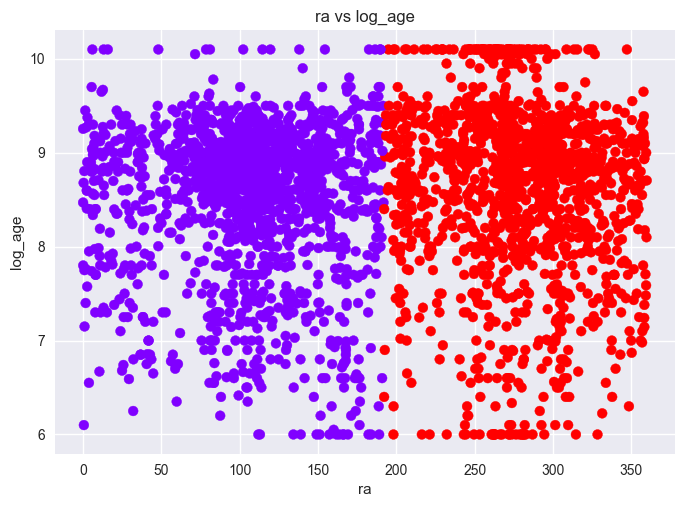

Fraction of 'OPEN STAR CLUSTER' in 1507: 0.5150454863540938
Fraction of 'OPEN STAR CLUSTER' in 1498: 0.48495451364590625
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 1507: 0.23809523809523808
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 1498: 0.7619047619047619


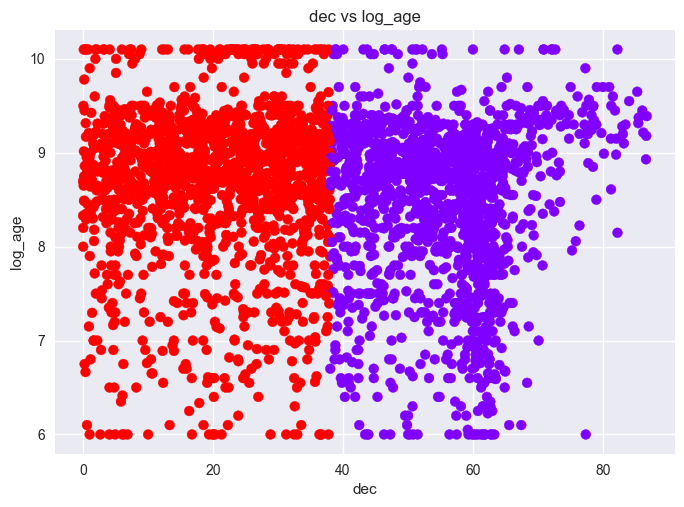

Fraction of 'OPEN STAR CLUSTER' in 1747: 0.5871238628411477
Fraction of 'OPEN STAR CLUSTER' in 1258: 0.41287613715885235
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 1747: 0.46938775510204084
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 1258: 0.5306122448979592


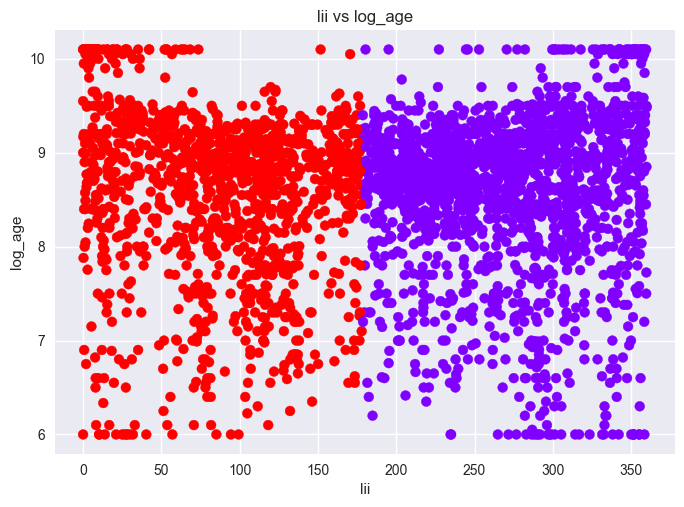

Fraction of 'OPEN STAR CLUSTER' in 2482: 0.8379986004198741
Fraction of 'OPEN STAR CLUSTER' in 523: 0.16200139958012597
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 2482: 0.5918367346938775
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 523: 0.40816326530612246


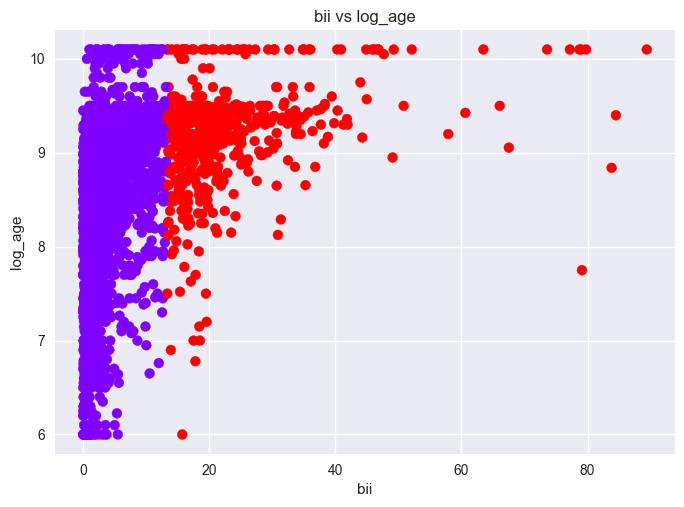

Fraction of 'OPEN STAR CLUSTER' in 2262: 0.7522743177046886
Fraction of 'OPEN STAR CLUSTER' in 737: 0.24597620713785864
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 2262: 0.7619047619047619
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 737: 0.23129251700680273


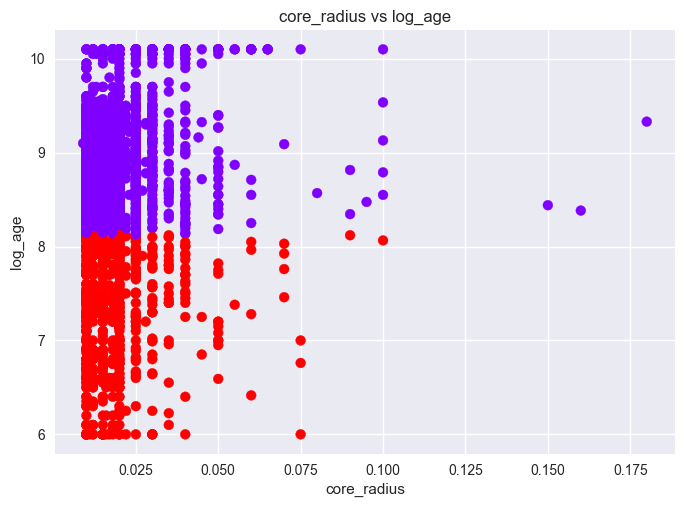

Fraction of 'OPEN STAR CLUSTER' in 2263: 0.7533240027991602
Fraction of 'OPEN STAR CLUSTER' in 737: 0.24527641707487755
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 2263: 0.7482993197278912
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 737: 0.24489795918367346


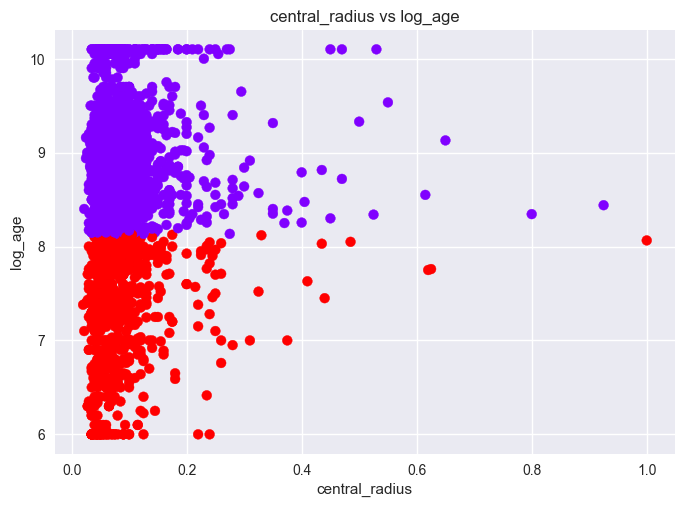

Fraction of 'OPEN STAR CLUSTER' in 737: 0.24527641707487755
Fraction of 'OPEN STAR CLUSTER' in 2263: 0.7533240027991602
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 737: 0.24489795918367346
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 2263: 0.7482993197278912


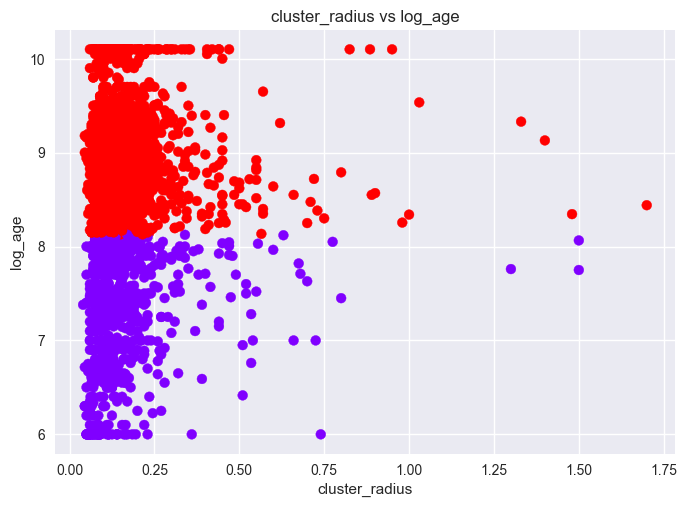

Fraction of 'OPEN STAR CLUSTER' in 2824: 0.9422673198040588
Fraction of 'OPEN STAR CLUSTER' in 174: 0.05598320503848846
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 2824: 0.891156462585034
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 174: 0.09523809523809523


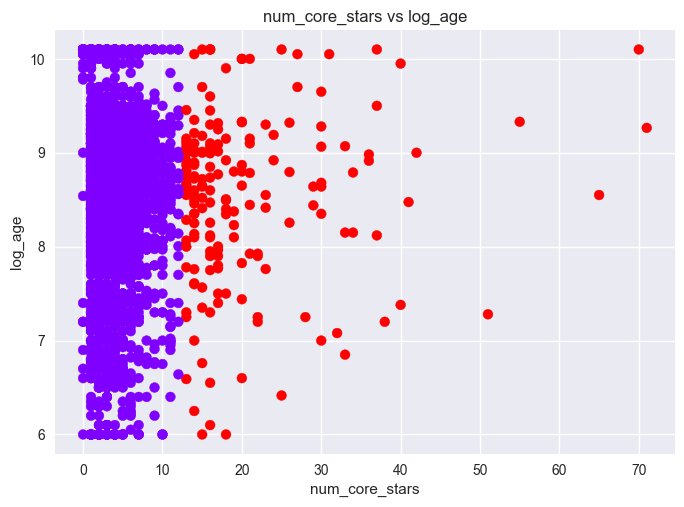

Fraction of 'OPEN STAR CLUSTER' in 2914: 0.9713086074177747
Fraction of 'OPEN STAR CLUSTER' in 85: 0.026941917424772567
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 2914: 0.9387755102040817
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 85: 0.05442176870748299


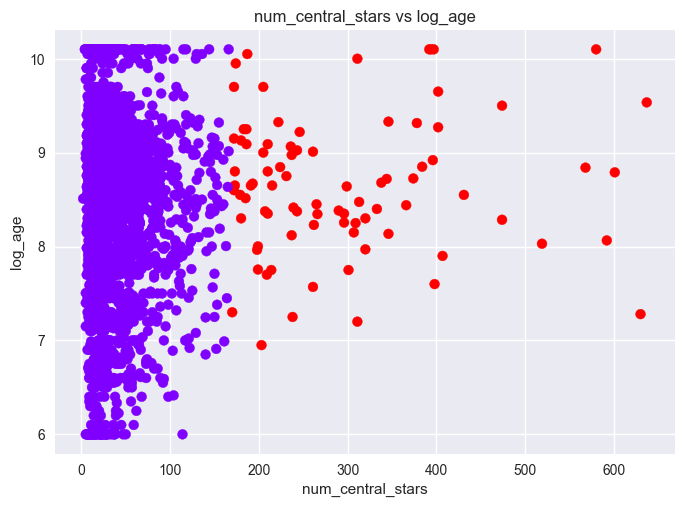

Fraction of 'OPEN STAR CLUSTER' in 2877: 0.9580125962211337
Fraction of 'OPEN STAR CLUSTER' in 123: 0.04058782365290413
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 2877: 0.9455782312925171
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 123: 0.047619047619047616


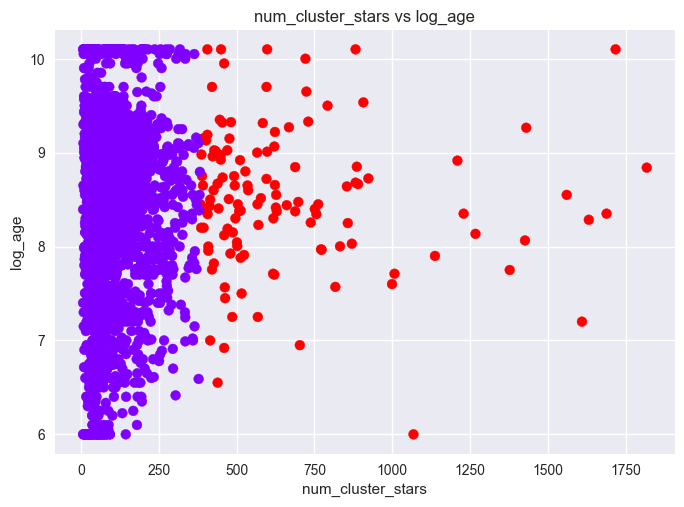

Fraction of 'OPEN STAR CLUSTER' in 2790: 0.9639608117564731
Fraction of 'OPEN STAR CLUSTER' in 212: 0.035339398180545836
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 2790: 0.23809523809523808
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 212: 0.7551020408163265


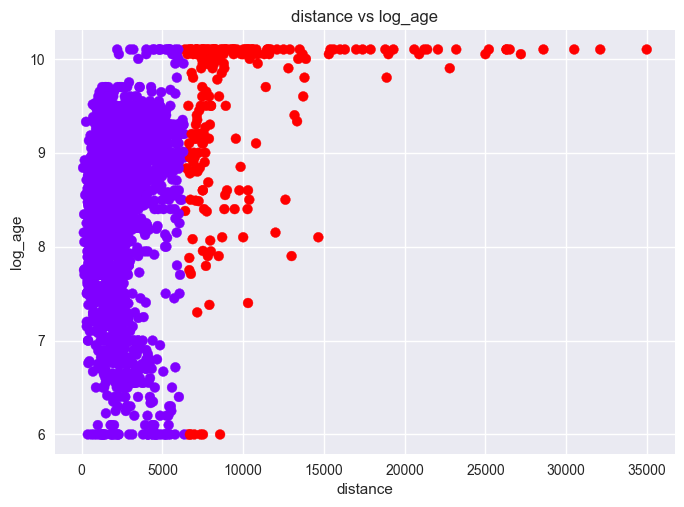

Fraction of 'OPEN STAR CLUSTER' in 753: 0.2634709587123863
Fraction of 'OPEN STAR CLUSTER' in 2252: 0.7365290412876138
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 753: 0.0
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 2252: 1.0


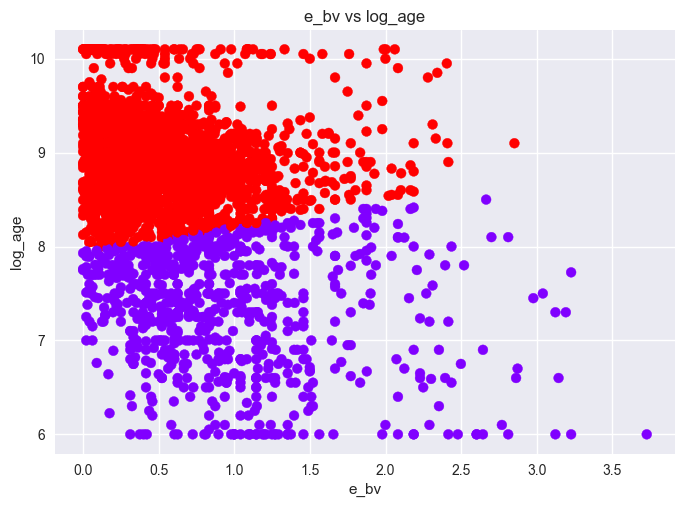

Fraction of 'OPEN STAR CLUSTER' in 2266: 0.7414275717284815
Fraction of 'OPEN STAR CLUSTER' in 739: 0.25857242827151855
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 2266: 1.0
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 739: 0.0


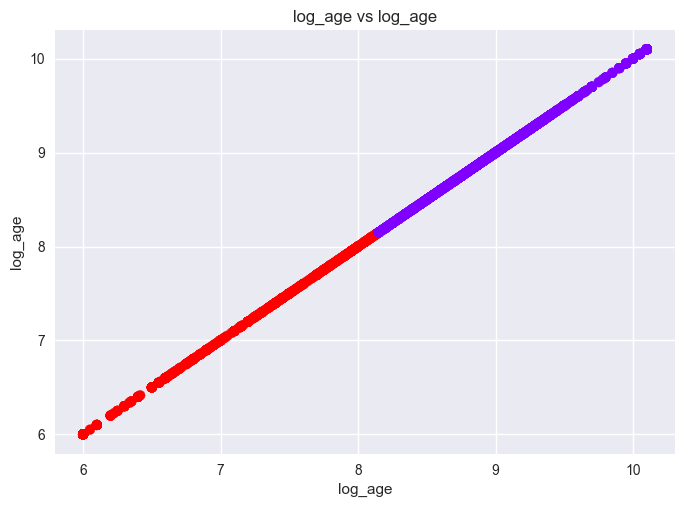

Fraction of 'OPEN STAR CLUSTER' in 509: 0.7654135338345864
Fraction of 'OPEN STAR CLUSTER' in 156: 0.23458646616541354
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 509: 0.0
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 156: 0.0


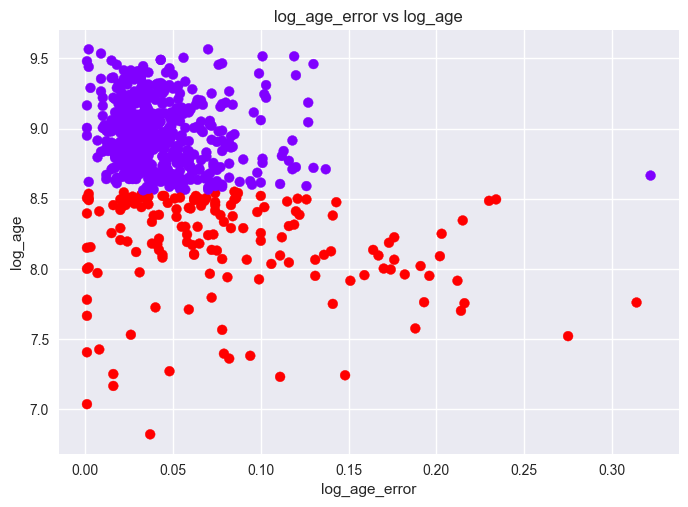

Ignoring non-numeric column: reference_code
Ignoring non-numeric column: cluster_type
Fraction of 'OPEN STAR CLUSTER' in 155: 0.28378378378378377
Fraction of 'OPEN STAR CLUSTER' in 213: 0.7162162162162162
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 155: 0.6258503401360545
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 213: 0.3673469387755102


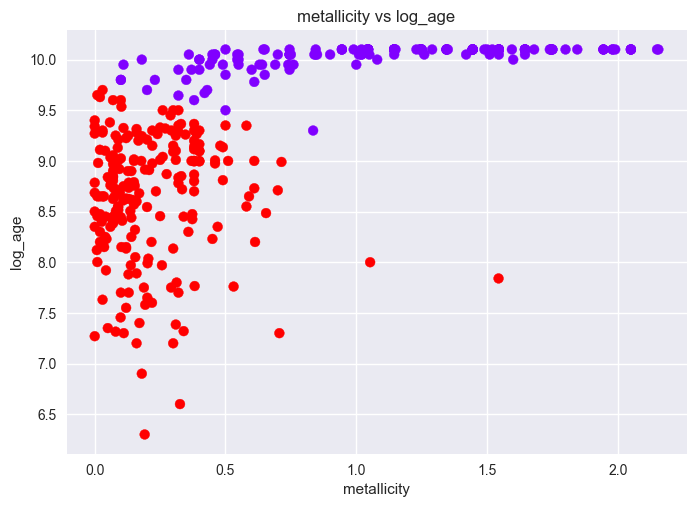

Fraction of 'OPEN STAR CLUSTER' in 102: 0.5930232558139535
Fraction of 'OPEN STAR CLUSTER' in 70: 0.4069767441860465
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 102: 0.0
Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in 70: 0.0


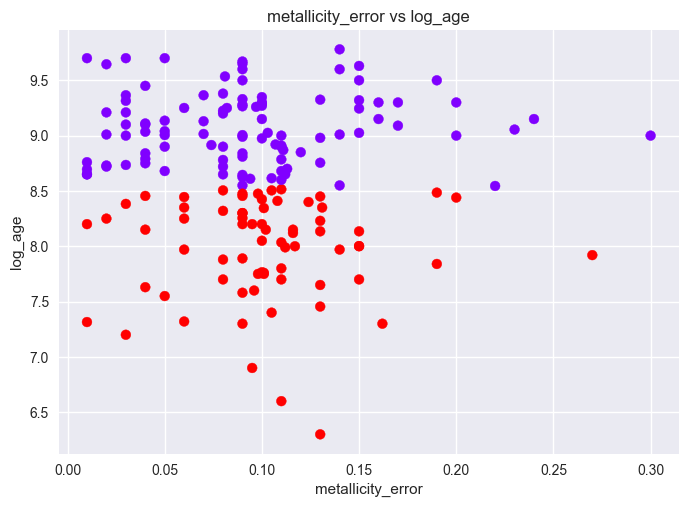

Ignoring non-numeric column: class
Scatter plots created and saved: ['scatter_plot_ra_vs_log_age.png', 'scatter_plot_dec_vs_log_age.png', 'scatter_plot_lii_vs_log_age.png', 'scatter_plot_bii_vs_log_age.png', 'scatter_plot_core_radius_vs_log_age.png', 'scatter_plot_central_radius_vs_log_age.png', 'scatter_plot_cluster_radius_vs_log_age.png', 'scatter_plot_num_core_stars_vs_log_age.png', 'scatter_plot_num_central_stars_vs_log_age.png', 'scatter_plot_num_cluster_stars_vs_log_age.png', 'scatter_plot_distance_vs_log_age.png', 'scatter_plot_e_bv_vs_log_age.png', 'scatter_plot_log_age_vs_log_age.png', 'scatter_plot_log_age_error_vs_log_age.png', 'scatter_plot_metallicity_vs_log_age.png', 'scatter_plot_metallicity_error_vs_log_age.png']


In [12]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

def create_scatter_plots(csv_file_path, target_column_index):
    try:
        # Read the CSV file and get column titles
        with open(csv_file_path, 'r', newline='') as csvfile:
            reader = csv.reader(csvfile)
            column_titles = next(reader)  # Read the first row as column titles

            # Create an array to store scatter plots
            scatter_plots = []

            # Iterate through each column (excluding the target column)
            for i in range(len(column_titles)):
                if i != target_column_index:
                    # Read data for the scatter plot, handling non-numeric and empty values
                    scatter_data = []
                    original_classes = []  # To store the original 'class' labels for each data point
                    try:
                        for row in reader:
                            # Check for 'OPEN STAR CLUSTER' or 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC'
                            if row[-1] in ['OPEN STAR CLUSTER', 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC']:
                                if row[target_column_index] and row[i]:
                                    scatter_data.append([np.abs(float(row[i])), float(row[target_column_index])])
                                    original_classes.append(row[-1])
                    except ValueError:
                        print(f"Ignoring non-numeric column: {column_titles[i]}")
                        continue

                    # Convert scatter data to numpy array for easier manipulation
                    scatter_data = np.array(scatter_data)

                    # Calculate the median and standard deviation of the x-values
                    median_x = np.median(scatter_data[:, 0])
                    std_dev_x = np.std(scatter_data[:, 0])

                    # Filter out data points more than 10 standard deviations from the median
                    filtered_data = scatter_data[
                        np.abs(scatter_data[:, 0] - median_x) <= 10 * std_dev_x
                    ]

                    # Use KMeans for clustering
                    est = KMeans(2)
                    est.fit(filtered_data)
                    y_kmeans = est.predict(filtered_data)

                    # Plot the scatter plot with color-coded clusters
                    plt.scatter(filtered_data[:, 0], filtered_data[:, 1], c=y_kmeans, s=50, cmap='rainbow')

                    # Label the plot
                    plt.title(f'{column_titles[i]} vs {column_titles[target_column_index]}')
                    plt.xlabel(column_titles[i])
                    plt.ylabel(column_titles[target_column_index])

                    # Calculate the fraction of each class within each cluster
                    cluster_0_indices = np.where(y_kmeans == 0)[0]
                    cluster_1_indices = np.where(y_kmeans == 1)[0]

                    total_open_star = original_classes.count('OPEN STAR CLUSTER')
                    total_globular = original_classes.count('GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC')

                    fraction_cluster_0_open_star = sum(
                        1 for index in cluster_0_indices if original_classes[index] == 'OPEN STAR CLUSTER'
                    ) / total_open_star if total_open_star > 0 else 0.0

                    fraction_cluster_1_open_star = sum(
                        1 for index in cluster_1_indices if original_classes[index] == 'OPEN STAR CLUSTER'
                    ) / total_open_star if total_open_star > 0 else 0.0

                    fraction_cluster_0_globular = sum(
                        1 for index in cluster_0_indices if original_classes[index] == 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC'
                    ) / total_globular if total_globular > 0 else 0.0

                    fraction_cluster_1_globular = sum(
                        1 for index in cluster_1_indices if original_classes[index] == 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC'
                    ) / total_globular if total_globular > 0 else 0.0

                    # Change cluster names based on color
                    cluster_names = ['Red Cluster' if cluster_color == 0 else 'Blue Cluster' for cluster_color in y_kmeans]

                    print(f"Fraction of 'OPEN STAR CLUSTER' in {cluster_names.count('Red Cluster')}: {fraction_cluster_0_open_star}")
                    print(f"Fraction of 'OPEN STAR CLUSTER' in {cluster_names.count('Blue Cluster')}: {fraction_cluster_1_open_star}")
                    print(f"Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in {cluster_names.count('Red Cluster')}: {fraction_cluster_0_globular}")
                    print(f"Fraction of 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC' in {cluster_names.count('Blue Cluster')}: {fraction_cluster_1_globular}")

                    # Save the plot to a file or display it
                    # You can customize this part based on your preference
                    plot_filename = f'scatter_plot_{column_titles[i]}_vs_{column_titles[target_column_index]}.png'
                    #plt.savefig(plot_filename)
                    scatter_plots.append(plot_filename)
                    plt.show()

                    # Reset file pointer for the next iteration
                    csvfile.seek(0)
                    next(reader)  # Skip the header row

            return scatter_plots

    except FileNotFoundError:
        print(f"File not found: {csv_file_path}")
        return None

# Example usage:
csv_file_path = 'MWSC_catalogue.csv'
target_column_index = -7  # Replace with the desired target column index

scatter_plots = create_scatter_plots(csv_file_path, target_column_index)

if scatter_plots is not None:
    print(f"Scatter plots created and saved: {scatter_plots}")
